In [36]:
# Importo las bibliotecas básicas:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')  # Para evitar los molestos avisos.
%matplotlib inline

In [37]:
# Read data
data = pd.read_csv('datos.csv')

In [38]:
# Clean data

# Problems with errors
zero_time = np.where(data['notape'] <= 1e-17)
print("Datos con errores")
print(zero_time)
data.drop(zero_time[0], inplace = True)

# Fixing columns names
data.rename(columns={
    key: key.strip() for key in data.keys()
    }, inplace = True)

# Fixing string values
for col in data.columns:
    if type(data[col][0]) == str:
        data[col] = [val.strip() for val in data[col]]
        
        
# Adding problem label
data['problem_tag'] = data['problem'].apply(lambda x: x[0])
data['optim_routes'] = data['problem'].apply(lambda x: x[x.index("K")+1:])

Datos con errores
(array([], dtype=int64),)


In [62]:
def describe(data):
    print(data.describe())
    print(data.info())
    
    plot_boxplot(data, 'ratio')

def plot_boxplot(data, key:str):
    """
    Plot a boxplot using the dataframe indexing on key
    """
    plt.boxplot(data[key])
    plt.title(f"Box Plot {key}")
    plt.legend([key])
    plt.show()

def plot_hist(data, key):
    sns.distplot(data[key])
    

def plot_corr_scatter_matrix(data, keys):
    sns.set()
    sns.pairplot(data[np.array(keys)], size=2.5)
    plt.show()

def iqr(data, key):
    """
    Calculates the IQR from the data associated with key
    """
    Q1 = np.percentile(data[key], 25,
                interpolation = 'midpoint')
  
    Q3 = np.percentile(data[key], 75,
                    interpolation = 'midpoint')
    IQR = Q3 - Q1
    return Q1, Q3, IQR

def get_outliers(data, key, upper=True):
    """
    Returns the outliers of data[key]
    """
    Q1, Q3, IQR = iqr(data,key)
    if upper:
        return data[data[key] >= Q3 + IQR*1.5]
    return data[data[key] <= Q1 - IQR*1.5]

def remove_outliers(data, key, remove_upper=True, remove_lower=True):
    """
    Returns the data in key without the outliers 
    """
    base_data = data
    if remove_upper:
        base_data = base_data[~base_data.isin(get_outliers(data, key))]
    if remove_lower:
        base_data = base_data[~base_data.isin(get_outliers(data, key, False))]
    return base_data

def plot_corr(df,size=10):
    """
    Function plots a graphical correlation matrix
    for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot
    """

    corr = df.corr()
    corr.style.background_gradient(cmap='coolwarm').set_precision(2)
    fig, ax = plt.subplots(figsize=(size+size/2.0, size))
    # ax.matshow(corr)
    # plt.xticks(range(len(corr.columns)), corr.columns)
    # plt.yticks(range(len(corr.columns)), corr.columns)
    
    sns.heatmap(corr,
            cmap='coolwarm',
            annot=True,
            )

def plot_scatter_matrix(data, keys:tuple):
    pd.plotting.scatter_matrix(data.loc[:,keys])
    
def anova(data, factor, objetive, alpha=0.1):
    # TODO Check for assumptions
    import scipy.stats as stats
    levels = set(data[factor])
    levels = [data[objetive][data[factor] == level] for level in levels]
    result = stats.f_oneway(*levels)
    if result.pvalue < alpha:
        # H0 is rejected
        print(f"ANOVA: {factor} influences {objetive}")
    else:
        print(f"ANOVA: {factor} does not influences {objetive}")
    print(result.pvalue)

            notape         tape        ratio       routes   iterations  \
count  2427.000000  2427.000000  2427.000000  2427.000000  2427.000000   
mean     32.707729    48.759323     2.259434    17.873094    36.799753   
std     163.371674   216.677229     0.718694    18.512611    28.247469   
min       0.001000     0.001000     0.500000     4.000000     1.000000   
25%       0.079000     0.227500     1.730769     4.000000    18.000000   
50%       0.625000     1.598000     2.156309    13.000000    25.000000   
75%       3.448000     6.734000     2.713047    20.000000    51.000000   
max    2507.304000  2764.391000    12.000000    78.000000   101.000000   

           clients    maxroutes      current   total  
count  2427.000000  2427.000000  2427.000000  2427.0  
mean     57.189122     0.517923    15.504326    30.0  
std      34.002341     0.499782     8.657081     0.0  
min      32.000000     0.000000     1.000000    30.0  
25%      33.000000     0.000000     8.000000    30.0  
50%

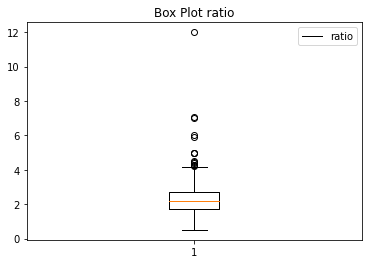

In [63]:
p1 = data[data['problem'] == "A-N32-K5"]
p1.head()


# Resumen de estadística descriptiva:
describe(data)

<AxesSubplot:xlabel='ratio', ylabel='Density'>

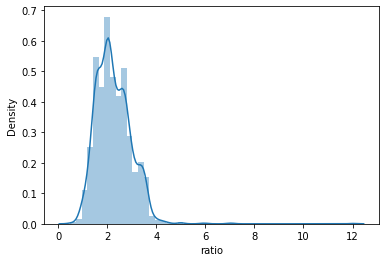

In [64]:
# Histograma:

sns.distplot(data['ratio'])

# plot_corr(data)
# get_outliers(data, 'ratio').describe()
# get_outliers(data, 'ratio', False).describe()

# remove_outliers(data, "ratio").describe()
# data.describe()
# plot_corr(data)
# plot_scatter_matrix(data, ('notape', 'tape'))
# anova(data, "problem", "ratio")



In [65]:
# Asimetría y curtosis:

print("Skewness: %f" % data['ratio'].skew())
print("Kurtosis: %f" % data['ratio'].kurt())

Skewness: 1.710658
Kurtosis: 15.282201


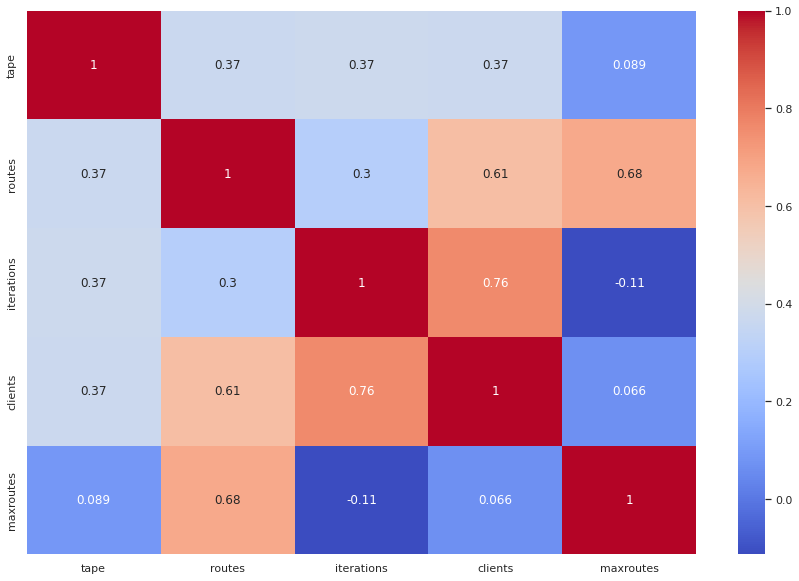

In [71]:
# Matriz de correlación:

#plot_corr(data)
data1= data.drop(['current','total','notape','ratio'], axis=1)

plot_corr(data1)

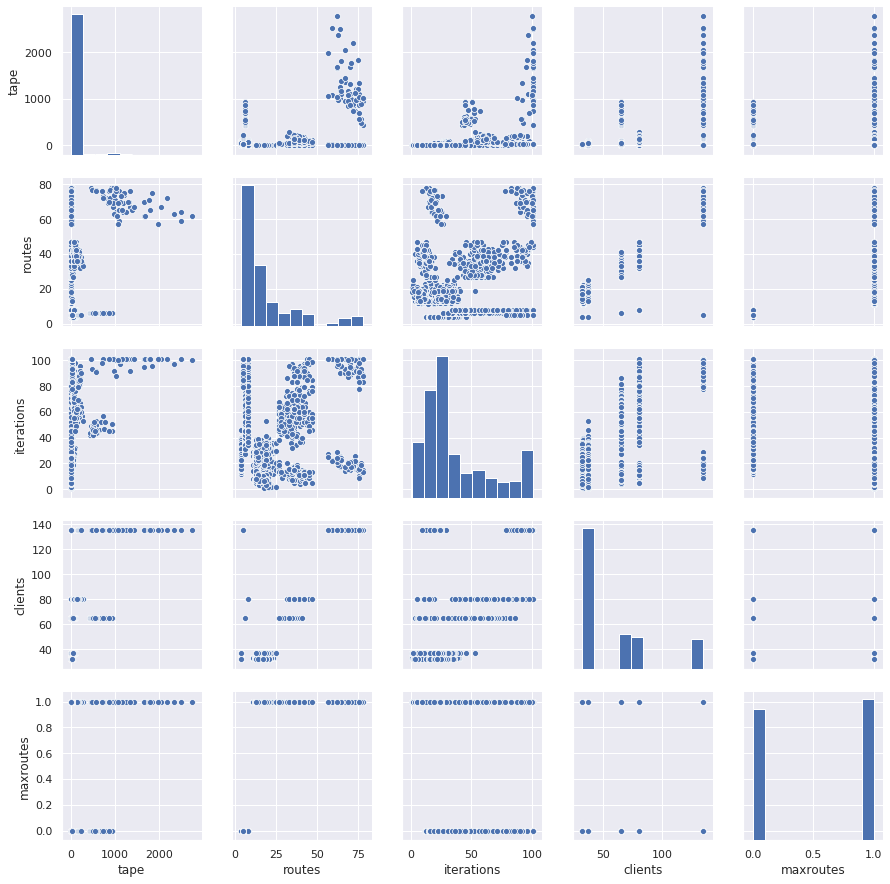

In [34]:
# Scatter plot:
plot_corr_scatter_matrix(data1, data1.columns.values)


In [35]:
# Grouping data

d = data.groupby(["problem", "criterion"])

for name, group in d:
    print(name)
    print(group)

('A-N32-K5', 'RAB')
      problem criterion  notape   tape      ratio  routes  iterations  \
719  A-N32-K5       RAB   0.001  0.012  12.000000      17           5   
720  A-N32-K5       RAB   0.003  0.009   3.000000      13           7   
721  A-N32-K5       RAB   0.002  0.003   1.500000      19           5   
722  A-N32-K5       RAB   0.001  0.003   3.000000      18           5   
723  A-N32-K5       RAB   0.003  0.003   1.000000      16           5   
724  A-N32-K5       RAB   0.002  0.005   2.500000      18           5   
725  A-N32-K5       RAB   0.001  0.002   2.000000      17           4   
726  A-N32-K5       RAB   0.002  0.004   2.000000      18           5   
727  A-N32-K5       RAB   0.002  0.003   1.500000      17           5   
728  A-N32-K5       RAB   0.001  0.002   2.000000      17           4   
729  A-N32-K5       RAB   0.002  0.003   1.500000      21           3   
730  A-N32-K5       RAB   0.004  0.008   2.000000      13           8   
731  A-N32-K5       RAB   0.002